In [3]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from cascid.configs import pad_ufes
from cascid import image_preprocessing, image_sampling


In [4]:
df = pd.read_csv(pad_ufes.METADATA)
hair_ids = [
    "PAT_691", "PAT_320", "PAT_109", "PAT_356", "PAT_681", "PAT_167",
    "PAT_2109", "PAT_245", "PAT_633"
]
df_hair_test = df[df["patient_id"].isin(hair_ids)]

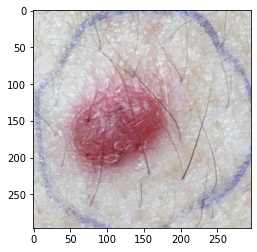

In [5]:
filename = df_hair_test['img_id'].iloc[10]
filename = str(pad_ufes.IMAGES_DIR / filename)
img = cv2.imread(filename)[:,:,::-1]
plt.imshow(img)
plt.show()

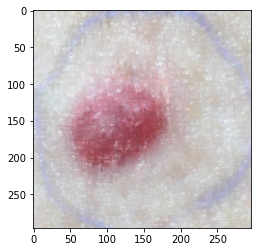

In [6]:
dst  = image_preprocessing.remove_hairs(img)
plt.imshow(dst)

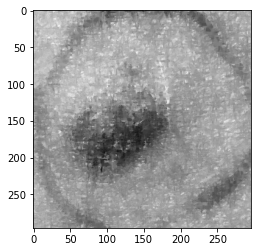

In [7]:
processed_img  = image_preprocessing.preprocessing_article(dst)
plt.imshow(processed_img, cmap='gray')

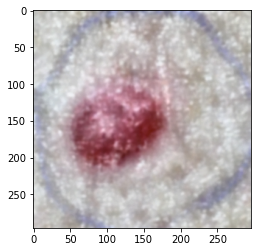

In [8]:
processed_img = image_preprocessing.preprocessing_lab_histeq(dst)
plt.imshow(processed_img)

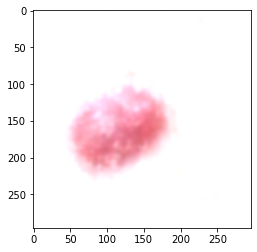

In [9]:
processed_img = image_preprocessing.enhance_contrast_ab(dst, 1.4, 15)
plt.imshow(processed_img)

In [10]:
DEST_DIR = "../../../preprocessed_hair/"

In [11]:
all_images = os.listdir(pad_ufes.IMAGES_DIR)
all_images

['PAT_1000_31_620.png',
 'PAT_1006_53_385.png',
 'PAT_1006_53_716.png',
 'PAT_1008_59_297.png',
 'PAT_100_393_595.png',
 'PAT_100_393_898.png',
 'PAT_1013_82_876.png',
 'PAT_1014_85_22.png',
 'PAT_1014_86_861.png',
 'PAT_1017_97_577.png',
 'PAT_1018_107_68.png',
 'PAT_1019_110_194.png',
 'PAT_101_1041_651.png',
 'PAT_101_1041_658.png',
 'PAT_101_1041_898.png',
 'PAT_1020_111_593.png',
 'PAT_1021_112_40.png',
 'PAT_1022_114_756.png',
 'PAT_1022_115_132.png',
 'PAT_1026_124_206.png',
 'PAT_1026_124_346.png',
 'PAT_1027_128_854.png',
 'PAT_1029_135_239.png',
 'PAT_1029_135_983.png',
 'PAT_1031_148_29.png',
 'PAT_1031_148_292.png',
 'PAT_1031_148_66.png',
 'PAT_1033_153_301.png',
 'PAT_1034_160_819.png',
 'PAT_1034_161_203.png',
 'PAT_1035_165_800.png',
 'PAT_1036_169_687.png',
 'PAT_1042_187_746.png',
 'PAT_1046_203_511.png',
 'PAT_104_1754_276.png',
 'PAT_104_1755_320.png',
 'PAT_104_1756_151.png',
 'PAT_1051_220_356.png',
 'PAT_1057_242_297.png',
 'PAT_1061_254_813.png',
 'PAT_1062_264_

In [ ]:
for img in all_images:  
    image_sampling.save_preprocessed_imgs(str(pad_ufes.IMAGES_DIR / img), image_preprocessing.remove_hairs, str(DEST_DIR + img))

In [12]:
def folder_to_list(src_dir, ):

    imgs_list = []
    for f in os.listdir(src_dir):
        if f.endswith(".png"):
            print(f)
            filename = src_dir+f
            img = cv2.imread(filename)[:,:,::-1]
            imgs_list.append((img,f))

    return imgs_list
    #pickle.dump(imgs_list,dest_dir)

In [14]:
imgs_list = folder_to_list("../../../preprocessed_hair/")

PAT_1000_31_620.png
PAT_1006_53_385.png
PAT_1006_53_716.png
PAT_1008_59_297.png
PAT_100_393_595.png
PAT_100_393_898.png
PAT_1013_82_876.png
PAT_1014_85_22.png
PAT_1014_86_861.png
PAT_1017_97_577.png
PAT_1018_107_68.png
PAT_1019_110_194.png
PAT_101_1041_651.png
PAT_101_1041_658.png
PAT_101_1041_898.png
PAT_1020_111_593.png
PAT_1021_112_40.png
PAT_1022_114_756.png
PAT_1022_115_132.png
PAT_1026_124_206.png
PAT_1026_124_346.png
PAT_1027_128_854.png
PAT_1029_135_239.png
PAT_1029_135_983.png
PAT_1031_148_29.png
PAT_1031_148_292.png
PAT_1031_148_66.png
PAT_1033_153_301.png
PAT_1034_160_819.png
PAT_1034_161_203.png
PAT_1035_165_800.png
PAT_1036_169_687.png
PAT_1042_187_746.png
PAT_1046_203_511.png
PAT_104_1754_276.png
PAT_104_1755_320.png
PAT_104_1756_151.png
PAT_1051_220_356.png
PAT_1057_242_297.png
PAT_1061_254_813.png
PAT_1062_264_741.png
PAT_1063_268_704.png
PAT_1063_268_919.png
PAT_1063_269_755.png
PAT_1063_270_593.png
PAT_1063_271_448.png
PAT_1064_272_668.png
PAT_1064_273_980.png
PAT_106

In [16]:
len(imgs_list)

2298

In [19]:
dest_dir = "../../../preprocessed_hair/hairless_imgs.pickle"
with open(dest_dir,"wb") as dest:
    pickle.dump(imgs_list,dest) 